# PARTE 1 - REGRESSÃO LINEAR SIMPLES

Carregue o conjunto de dados de gorjetas. Faça o que se pede:
1. Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).
2. Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado
3. Mostre na tela os valores dos pesos (parâmetros).
4. Para um valor de entrada de 30, qual a predição do modelo?
5. Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo. E.g.:

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [196]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Questão 1
Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).

In [197]:
#Importando do sciki-learn os métodos voltados para regressão
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Definindo a entrada(x) e a saída que quero predizer(y)
x = df[['total_bill']]
y = df[['tip']]

#O parâmetro test_size vai definir o tamanho dos dados selecionados para teste e o restante fica para treino, sendo quem tá implementando que decide
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.23)


In [198]:
# Vendo o número de registros que serão usados para o treino e teste
print('Treino')
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

print('\nTeste')
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

Treino
X_train:  (187, 1)
y_train:  (187, 1)

Teste
X_test:  (57, 1)
y_test:  (57, 1)


In [199]:
# Criando o modelo LinearRegression
regr = LinearRegression()
# Realizando treinamento do modelo
regr.fit(X_train, y_train)
# Realizar predição com os dados separados para teste
y_pred = regr.predict(X_test)
# Visualização dos resultados da predição
y_pred;

# Questão 2
Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado

In [200]:
print('Erro quadrático médio: %.2f' % mean_squared_error(y_test, y_pred))

Erro quadrático médio: 1.55


Complemento

In [201]:
#O coeficiente de Determinação (R²) varia entre 0 e 1 e expressa a quantidade da variância dos dados que é explicada pelo modelo linear. 
print('Coeficiente de Determinação: %.2f' % r2_score(y_test, y_pred))

Coeficiente de Determinação: 0.43


# Questão 3
Mostre na tela os valores dos pesos (parâmetros).

In [202]:
#Peso w0
print("Peso w0: \n", regr.intercept_)
#Peso w1
print("Peso w1: \n", regr.coef_)

Peso w0: 
 [0.99612946]
Peso w1: 
 [[0.10036884]]


# Questão 4
Para um valor de entrada de 30, qual a predição do modelo?

In [203]:
regr.predict([[30]])

array([[4.00719474]])

# Questão 5
Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo.

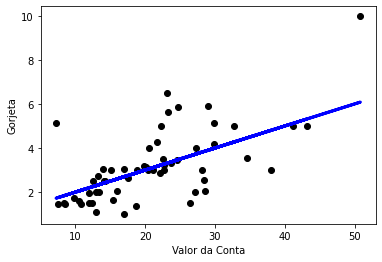

In [204]:
# Plotar com scatterplot
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Valor da Conta')
plt.ylabel('Gorjeta')
plt.show()